# Workshop: Logistic Regression and K-Nearest Neighbors (KNN)

In this workshop, we will explore two classification algorithms: Logistic Regression and KNN. We will use the following steps:

1. **Introduction to Logistic Regression and KNN**

2. **Data Processing using `breast_cancer` dataset**

3. **Implementing Logistic Regression**

4. **Implementing KNN**

5. **Model Evaluation (Precision, Accuracy, F1-Score, Recall)**


## Step 1: Importing the Necessary Libraries

In [36]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


## Step 2: Data Preparation
We'll use the breast_cancer dataset, which is a binary classification dataset containing features related to breast cancer diagnosis.

In [37]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Step 3: Implementing Logistic Regression

In [38]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)


## Step 4: Implementing KNN

In [39]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)


## Step 5: Model Evaluation (Precision, Accuracy, F1-Score, Recall)
Now, we will evaluate both models using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

Logistic Regression Evaluation

In [40]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Evaluation:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1-Score: 0.98

Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




Evaluate KNN


In [41]:
print("KNN Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Evaluation:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Confusion Matrix:
[[40  3]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



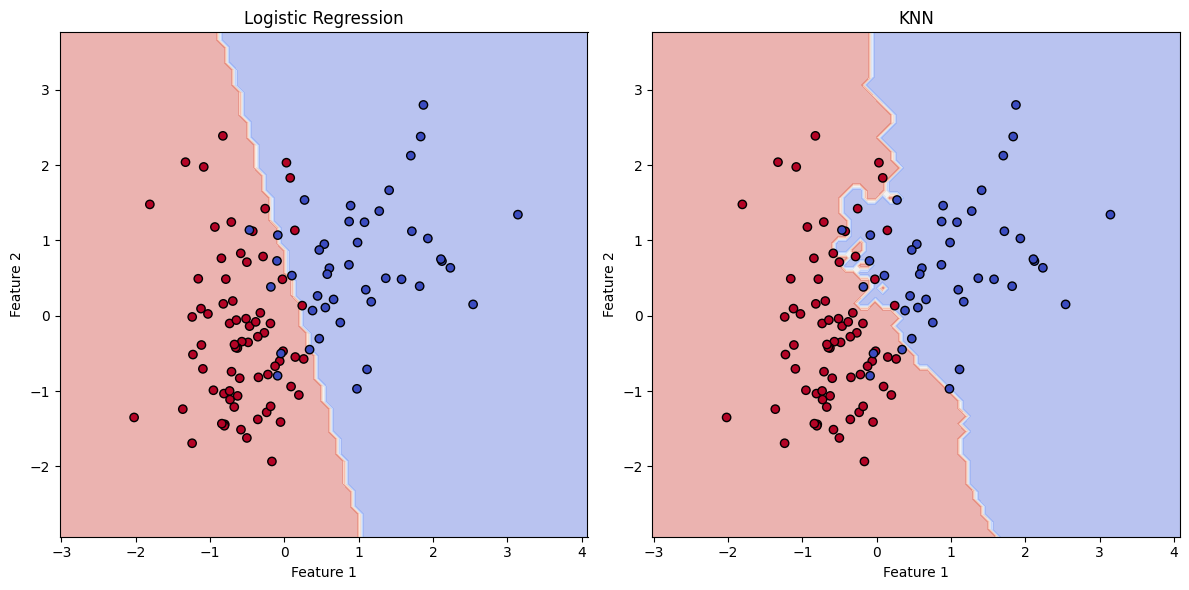

In [42]:
# Function to plot the decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    # Create mesh grid for the first two features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict classes over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting for Logistic Regression and KNN
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Using only the first two features for visualization
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

# Train models again using only the first two features for visualization
log_reg_2D = LogisticRegression(random_state=42)
log_reg_2D.fit(X_train_2D, y_train)

knn_2D = KNeighborsClassifier(n_neighbors=5)
knn_2D.fit(X_train_2D, y_train)

# Plot Logistic Regression decision boundary
plot_decision_boundary(log_reg_2D, X_test_2D, y_test, ax[0], "Logistic Regression")

# Plot KNN decision boundary
plot_decision_boundary(knn_2D, X_test_2D, y_test, ax[1], "KNN")

plt.tight_layout()
plt.show()


### Summary:
We used the breast_cancer dataset to predict cancer diagnosis using two algorithms: Logistic Regression and KNN.
We trained both models and evaluated them using key metrics such as accuracy, precision, recall, F1-score, and confusion matrix.
You can experiment with different K-values in KNN or modify the parameters of Logistic Regression to see their effects on model performance.

## Additional Models

Next, we will give some additional models here to help you choose and learn more. 

Note: This part is not for the workshop, you can choose to learn them or not, because these kinds of models are a little hard for AI beginners.

In [43]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree
from sklearn.ensemble import RandomForestClassifier  # For Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Decision Tree and Random Forest
decision_tree = DecisionTreeClassifier(random_state=42)  # Decision Tree
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest

# Train both models
decision_tree.fit(X_train_scaled, y_train)  # Train Decision Tree
random_forest.fit(X_train_scaled, y_train)  # Train Random Forest

# Predict with both models
y_pred_dt = decision_tree.predict(X_test_scaled)  # Predict with Decision Tree
y_pred_rf = random_forest.predict(X_test_scaled)  # Predict with Random Forest

# Function for evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print('-'*50)

# Evaluate Decision Tree and Random Forest
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Decision Tree Evaluation:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Confusion Matrix:
[[40  3]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

--------------------------------------------------


In [44]:
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Evaluation:
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-Score: 0.97

Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

--------------------------------------------------


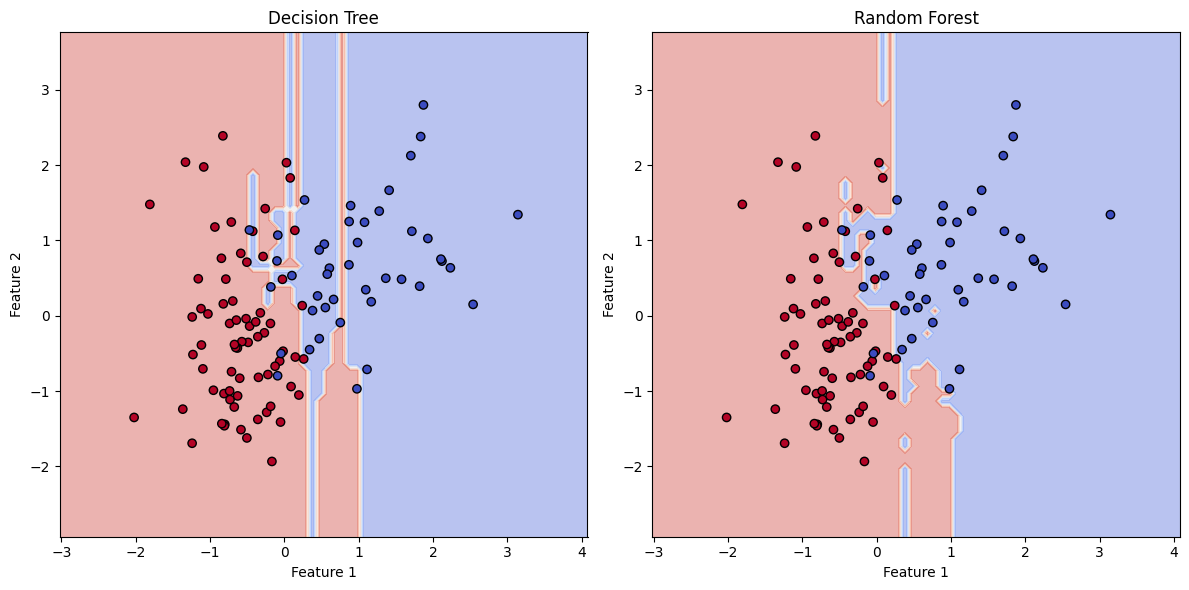

In [45]:
# Visualization: Decision Tree and Random Forest (using 2D for simplicity)
# Function to plot the decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    # Create mesh grid for the first two features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict classes over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting for Decision Tree and Random Forest
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Using only the first two features for visualization
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

# Train models again using only the first two features for visualization
decision_tree_2D = DecisionTreeClassifier(random_state=42)
decision_tree_2D.fit(X_train_2D, y_train)

random_forest_2D = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_2D.fit(X_train_2D, y_train)

# Plot Decision Tree decision boundary
plot_decision_boundary(decision_tree_2D, X_test_2D, y_test, ax[0], "Decision Tree")

# Plot Random Forest decision boundary
plot_decision_boundary(random_forest_2D, X_test_2D, y_test, ax[1], "Random Forest")

plt.tight_layout()
plt.show()
